# Wai Yu Amanda, Ng
- Student number: 1008217350
- UTORid: ngwai11

## 0. Find data set on kaggle.

In [225]:
# Import dataset "Crime Replication Dataset"
import pandas as pd; import numpy as np; from scipy import stats; import matplotlib.pyplot as plt

url = "https://github.com/amanda-ng518/STA365/blob/62e724be1797cc0eb1e6524d3c5bd557e11424e1/crime_replication.csv?raw=true"
df = pd.read_csv(url)


## 1. Provide posterior inference for a column of data with a PyMC normal-gamma specification.

The column "fear of crime" is chosen which demonstrates a normal distribution.

Text(0.5, 1.0, 'Histogram of fear_of_crime')

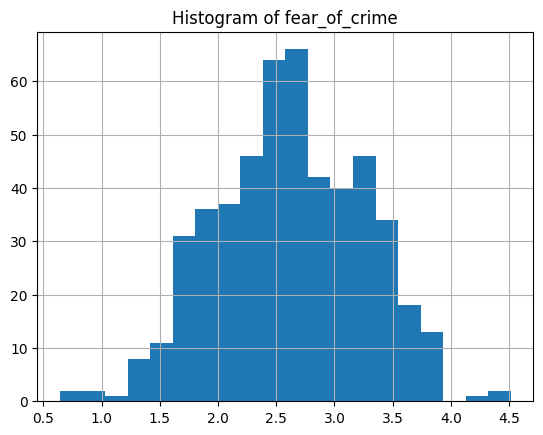

In [226]:
# Histogram of "fear_of_crime"
df.hist(column = "fear_of_crime", bins=20)
plt.title('Histogram of fear_of_crime')

###  `PyMC`: Probabilistic Programming

In [227]:
# MCMC Models
theta_0,tau = 0,1; alpha,beta = 2,1/2 # Initialize Prior Hyperparameters: specify prior distributions
fear_of_crime = df["fear_of_crime"]

import pymc as pm
normal_gamma_toy_model = pm.Model()
with normal_gamma_toy_model:
    theta = pm.Normal("theta", mu=0, sigma=1)
    phi = pm.Gamma("phi", alpha=1, beta=1)
    x_obs = pm.Normal("likelihood", mu=theta, sigma=1/phi**0.5, observed=fear_of_crime)

### Posterior Sampling

In [228]:
# MCMC Sampling
with normal_gamma_toy_model:
    idata_HMC = pm.sample()

### "Convergence" Checks

The split-rhats for theta and phi are both below 1.05, so the markov chains converges.

HMC Split-Rhats {'theta': 1.0039, 'phi': 1.0031} | 

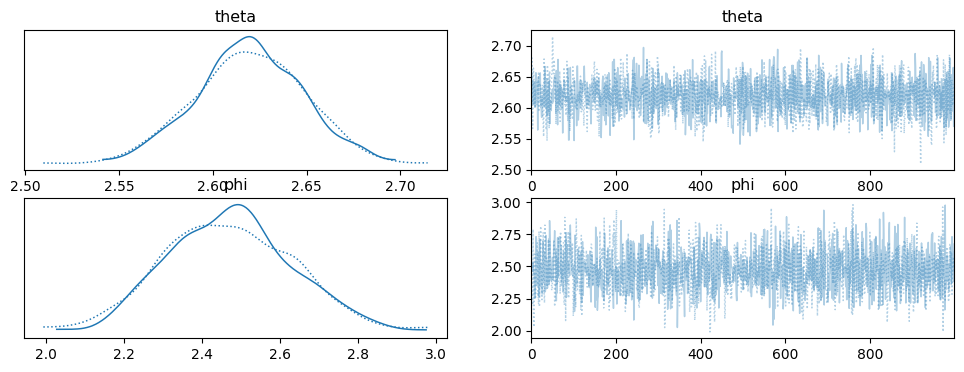

In [229]:
import arviz as az
az.plot_trace(idata_HMC)
print("HMC Split-Rhats", {k: np.round(v.values,4) for k,v in az.rhat(idata_HMC).items()}, end=' | ')

### Effective Sample Size

See ess_bulk for effective sample sizes.

In [230]:
print("number of MCMC samples:", idata_HMC.posterior['phi'].values.flatten().shape[-1])
az.summary(idata_HMC, round_to=2)

number of MCMC samples: 2000


,mean,sd,hdi_3%,hdi_97%,mcse_mean,mcse_sd,ess_bulk,ess_tail,r_hat
theta,2.62,0.03,2.56,2.67,0.0,0.0,2328.42,1349.25,1.0
phi,2.47,0.16,2.18,2.77,0.0,0.0,2100.72,1550.04,1.0


### Credible Intervals

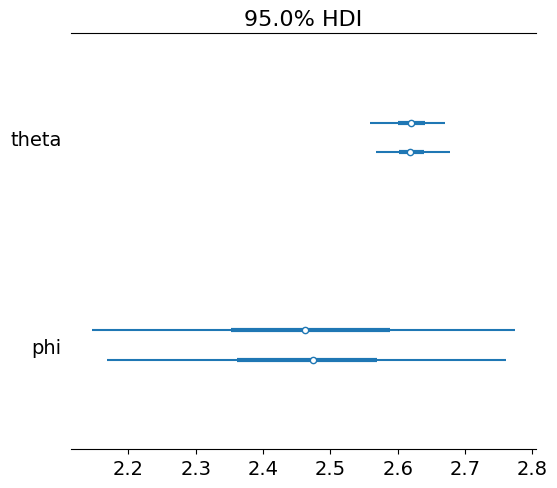

In [231]:
# Not combined: one HDI per markov chain
az.plot_forest(idata_HMC, var_names=["theta","phi"], combined=False, hdi_prob=0.95);

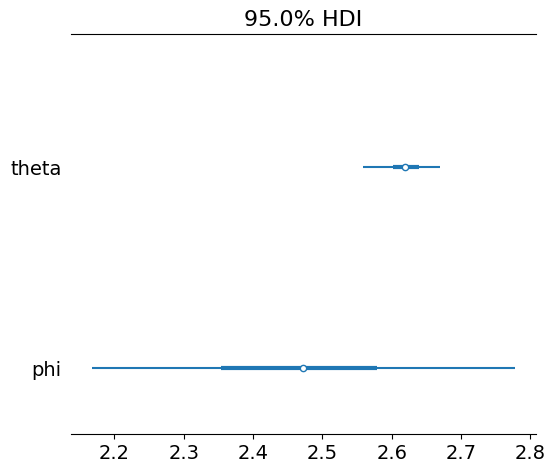

In [232]:
# Combined
az.plot_forest(idata_HMC, var_names=["theta","phi"], combined=True, hdi_prob=0.95);

## 2. Find a different column of data for which a normal-gamma specification isn't justified

The column "crime_victim" is chosen which demonstrates a bernoulli distribution. According to kaggle dataset discription, Crime_victim categorizes whether a participant has experienced being a victim of crime, with options "Yes" or "No."

Text(0.5, 1.0, 'Bar Chart of crime_victim')

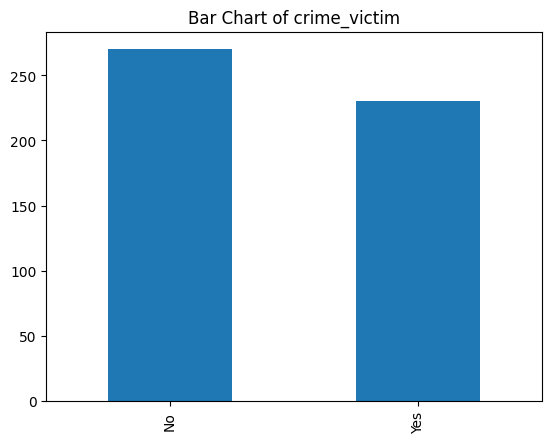

In [233]:
# Bar chart  of "crime_victim"
df['crime_victim'].value_counts().plot(kind='bar')
plt.title('Bar Chart of crime_victim')


## 3. Create a different PyMC specification that IS appropriate for this new data column:

In [234]:
crime_victim = df['crime_victim'].map({'Yes': 1, 'No': 0})
crime_victim = pd.DataFrame(crime_victim)

###  `PyMC`: Probabilistic Programming

In [235]:
# MCMC Models
theta_0= 0.5 # Initialize Prior Hyperparameters: specify prior distributions

import pymc as pm
bernoulli_uniform_toy_model = pm.Model()
with bernoulli_uniform_toy_model:
    theta = pm.Uniform("theta", lower=0, upper=1) # Uniform prior chosen with theta between 0 and 1
    x_obs = pm.Bernoulli("likelihood", p=theta, observed=crime_victim)
    # crime_victims follows a bernoulli distribution since it can only take one of the two values (0 or 1)

### Posterior Sampling

In [236]:
# MCMC Sampling
with bernoulli_uniform_toy_model:
    idata_HMC = pm.sample()

## 4. Provide posterior inference for the parameters of your new specification given the column of non-normal data using PyMC and provide an analysis of the MCMC chains.

### "Convergence" Checks

The split-rhats for theta is below 1.05, so the markov chains converges.

HMC Split-Rhats {'theta': 1.0003} | 

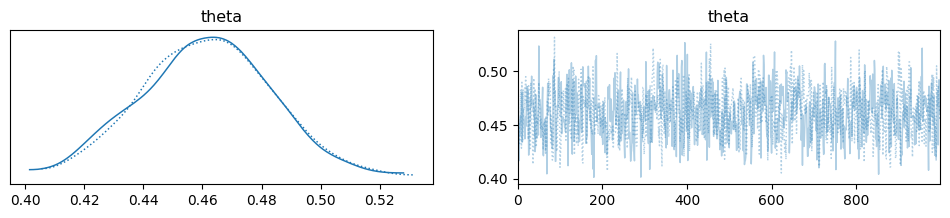

In [237]:
import arviz as az
az.plot_trace(idata_HMC)
print("HMC Split-Rhats", {k: np.round(v.values,4) for k,v in az.rhat(idata_HMC).items()}, end=' | ')

### Effective Sample Size

See ess_bulk for effective sample sizes.

In [238]:
print("number of MCMC samples:", idata_HMC.posterior['theta'].values.flatten().shape[-1])
az.summary(idata_HMC, round_to=2)

number of MCMC samples: 2000


,mean,sd,hdi_3%,hdi_97%,mcse_mean,mcse_sd,ess_bulk,ess_tail,r_hat
theta,0.46,0.02,0.42,0.5,0.0,0.0,930.83,1209.29,1.0


### Credible Interval

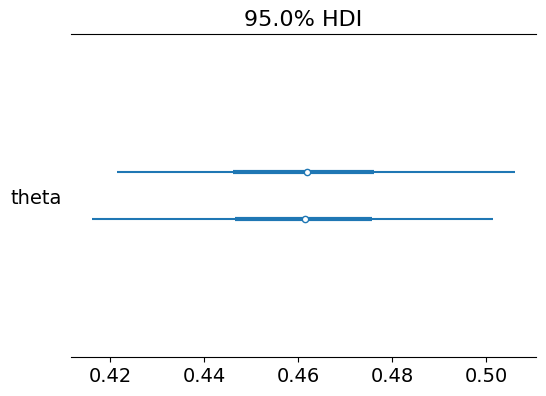

In [239]:
# Not combined: one HDI per markov chain
az.plot_forest(idata_HMC, var_names=["theta"], combined=False, hdi_prob=0.95);

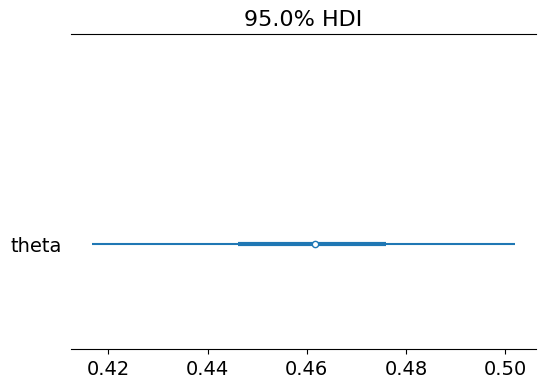

In [240]:
# Combined
az.plot_forest(idata_HMC, var_names=["theta"], combined=True, hdi_prob=0.95);